In [1]:
import numpy as np

np.poly1d([2, -1])**2 + np.poly1d([3, -5])**2 + np.poly1d([5, -6])**2

poly1d([ 38, -94,  62])

In [4]:
#%pip install sympy

In [7]:
import sympy as sym

theta = sym.Symbol('theta')
diff_th = sym.diff(38*theta**2 - 94*theta + 62, theta)
diff_th

76*theta - 94

In [8]:
94/76

1.236842105263158

## Boston  집값 예측

In [12]:
import pandas as pd

boston_url = "https://raw.githubusercontent.com/PinkWink/ML_tutorial/master/dataset/boston.csv"

boston = pd.read_csv(boston_url, sep=",")

boston.head()


,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33,36.2


In [16]:
boston.rename(columns={"MEDV":"PRICE"}, inplace=True)

In [17]:
import plotly.express as px

fig = px.histogram(boston, x='PRICE')
fig.show()

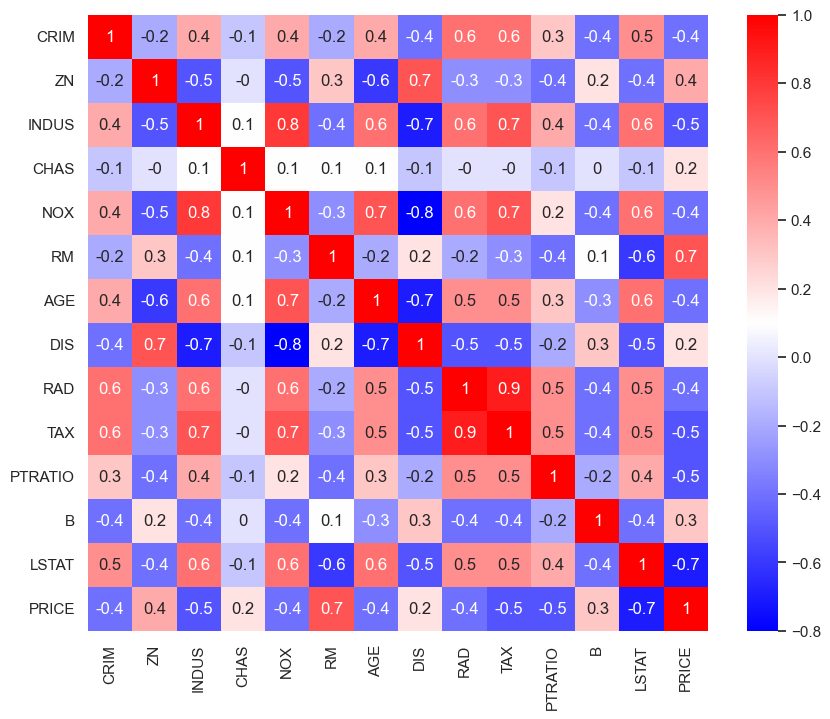

In [21]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

corr_mat = boston.corr().round(1)
sns.set(rc={'figure.figsize':(10,8)})
sns.heatmap(data=corr_mat, annot=True, cmap='bwr');

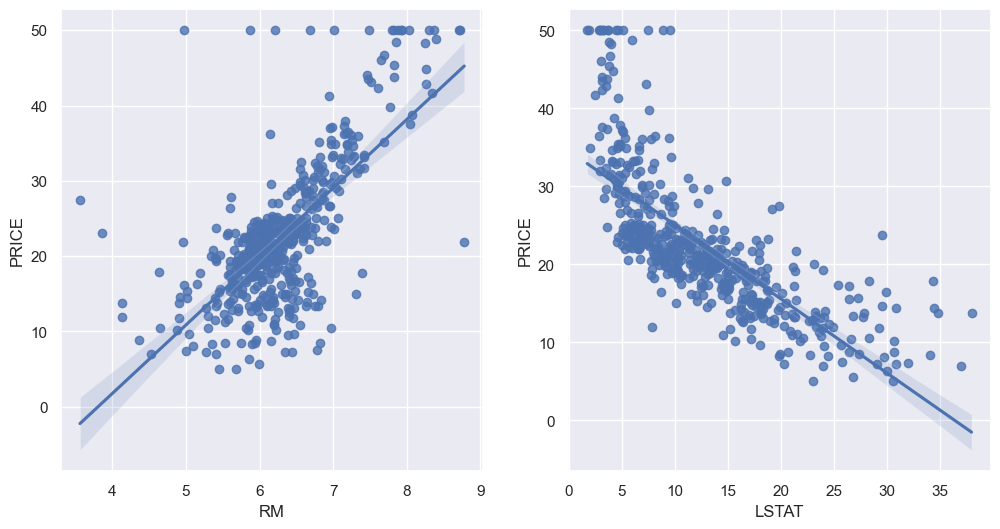

In [22]:
sns.set_style('darkgrid')
sns.set(rc={'figure.figsize': (12, 6)})

fig, ax = plt.subplots(ncols=2)

sns.regplot(x='RM', y='PRICE', data=boston, ax=ax[0])
sns.regplot(x='LSTAT', y='PRICE', data=boston, ax=ax[1]);

In [23]:
from sklearn.model_selection import train_test_split

X = boston.drop('PRICE', axis=1)
y = boston['PRICE']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 17)

In [24]:
from sklearn.linear_model import LinearRegression

reg = LinearRegression()
reg.fit(X_train, y_train)

LinearRegression()

In [25]:
import numpy as np
from sklearn.metrics import mean_squared_error

pred_tr = reg.predict(X_train)
pred_test = reg.predict(X_test)

rmse_tr = (np.sqrt(mean_squared_error(y_train, pred_tr)))
rmse_test = (np.sqrt(mean_squared_error(y_test, pred_test)))

print('RMSE of Train Data : ', rmse_tr)
print('RMSE of Test Data : ', rmse_test)

RMSE of Train Data :  4.7513630910700435
RMSE of Test Data :  4.451237675107985


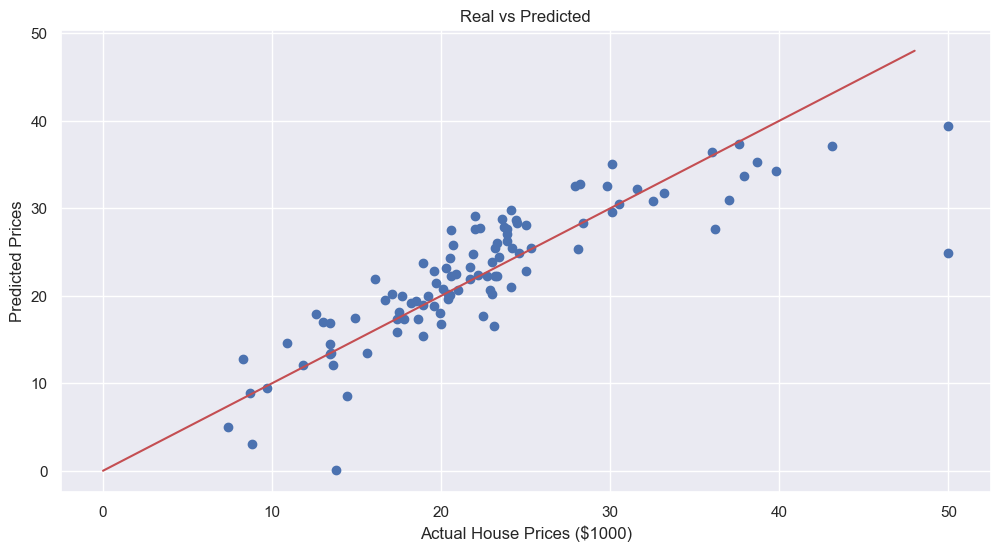

In [26]:
plt.scatter(y_test, pred_test)
plt.xlabel('Actual House Prices ($1000)')
plt.ylabel('Predicted Prices')
plt.title('Real vs Predicted')
plt.plot([0,48], [0,48], 'r')
plt.show()

In [27]:
X = boston.drop(['PRICE', 'LSTAT'], axis=1)
y = boston['PRICE']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 17)

In [28]:
reg = LinearRegression()
reg.fit(X_train, y_train)

LinearRegression()

In [29]:
pred_tr = reg.predict(X_train)
pred_test = reg.predict(X_test)

rmse_tr = (np.sqrt(mean_squared_error(y_train, pred_tr)))
rmse_test = (np.sqrt(mean_squared_error(y_test, pred_test)))

print('RMSE of Train Data : ', rmse_tr)
print('RMSE of Test Data : ', rmse_test)

RMSE of Train Data :  5.311319110396672
RMSE of Test Data :  4.62279873686181


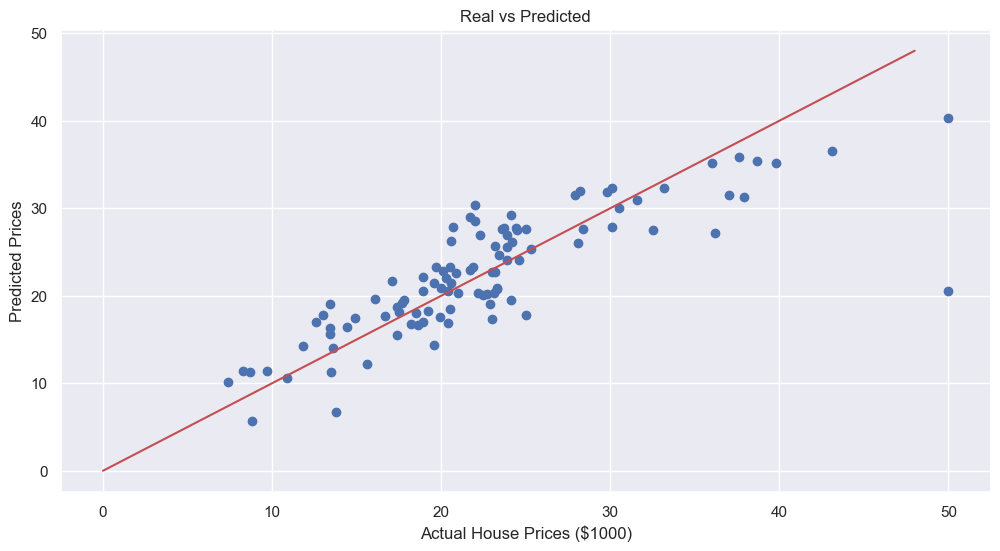

In [30]:
plt.scatter(y_test, pred_test)
plt.xlabel('Actual House Prices ($1000)')
plt.ylabel('Predicted Prices')
plt.title('Real vs Predicted')
plt.plot([0,48], [0,48], 'r')
plt.show()